In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# --- Step 1: Load the two datasets ---
# Make sure the paths are correct for your project structure
try:
    df_train = pd.read_csv('../datasets/train.csv')
    df_store = pd.read_csv('../datasets/store.csv')
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'train.csv' and 'store.csv' are in your datasets folder.")
    # Stop execution if files aren't found
    exit()


Files loaded successfully.


C:\Users\xlup\AppData\Local\Temp\ipykernel_1412\193866228.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../datasets/train.csv')


In [3]:
# --- Step 2: Merge the datasets into one ---
# We use a 'left' merge to combine the store information with each sales record.
df = pd.merge(df_train, df_store, how='left', on='Store')

print("Datasets merged successfully.")


Datasets merged successfully.


In [4]:
# --- Step 3: Crucial Time Series Preparation ---
# The 'Date' column is currently text. We MUST convert it to a datetime object.
# This unlocks all of pandas' powerful time series capabilities.
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# --- Step 4: Initial Inspection of the Combined Data ---

# Look at the first few rows of our new, combined DataFrame
print("\n--- First 5 Rows of Merged Data ---")
print(df.head())

# Get a technical summary (row count, column names, and check for missing values)
print("\n--- Data Info ---")
df.info()

# Get a statistical summary of the numerical columns
print("\n--- Statistical Summary ---")
print(df.describe())


--- First 5 Rows of Merged Data ---
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0 

In [6]:
# Let's see the sales numbers for days when stores were closed (Open == 0)
closed_store_sales = df[df['Open'] == 0]['Sales'].value_counts()
print("--- Sales on days when stores were closed ---")
print(closed_store_sales)
# The output will show that 100% of these sales are 0.

--- Sales on days when stores were closed ---
Sales
0    172817
Name: count, dtype: int64


In [7]:
# We create a new DataFrame that we will use for the rest of our analysis.
df_open = df[df['Open'] == 1].copy()
print(f"\nOriginal number of records: {len(df)}")
print(f"Number of records for open stores: {len(df_open)}")


Original number of records: 1017209
Number of records for open stores: 844392


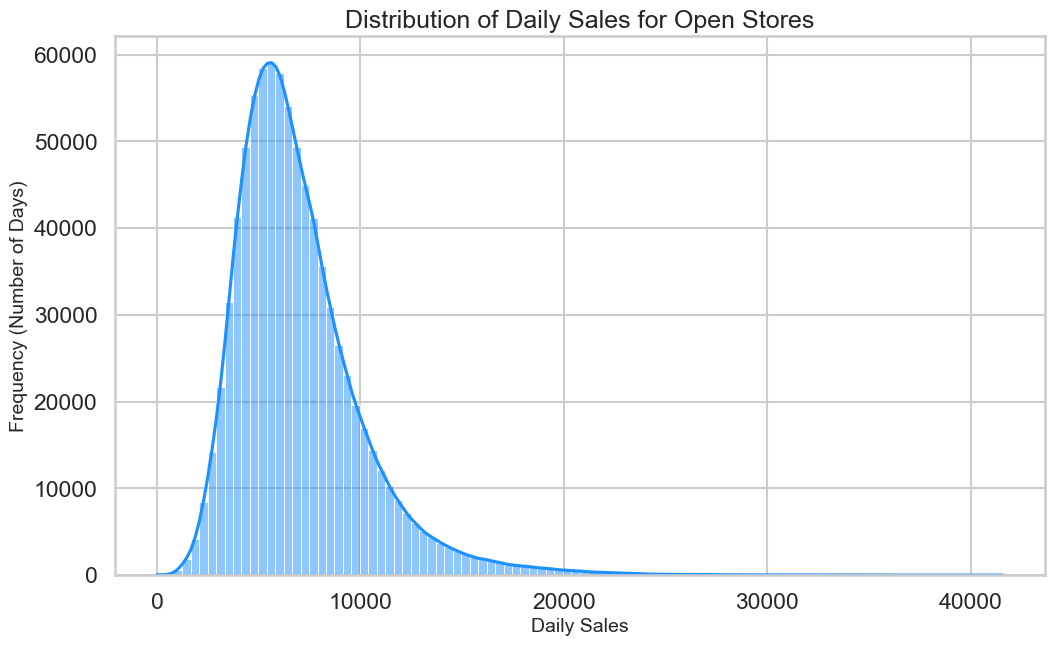

In [8]:
# Set a professional theme for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the figure for the plot
plt.figure(figsize=(12, 7))

# Generate the histogram for the 'Sales' column of our new DataFrame
sns.histplot(df_open['Sales'], bins=100, kde=True, color='dodgerblue')

# Add clear titles and labels
plt.title('Distribution of Daily Sales for Open Stores', fontsize=18)
plt.xlabel('Daily Sales', fontsize=14)
plt.ylabel('Frequency (Number of Days)', fontsize=14)

# Display the plot
plt.show()

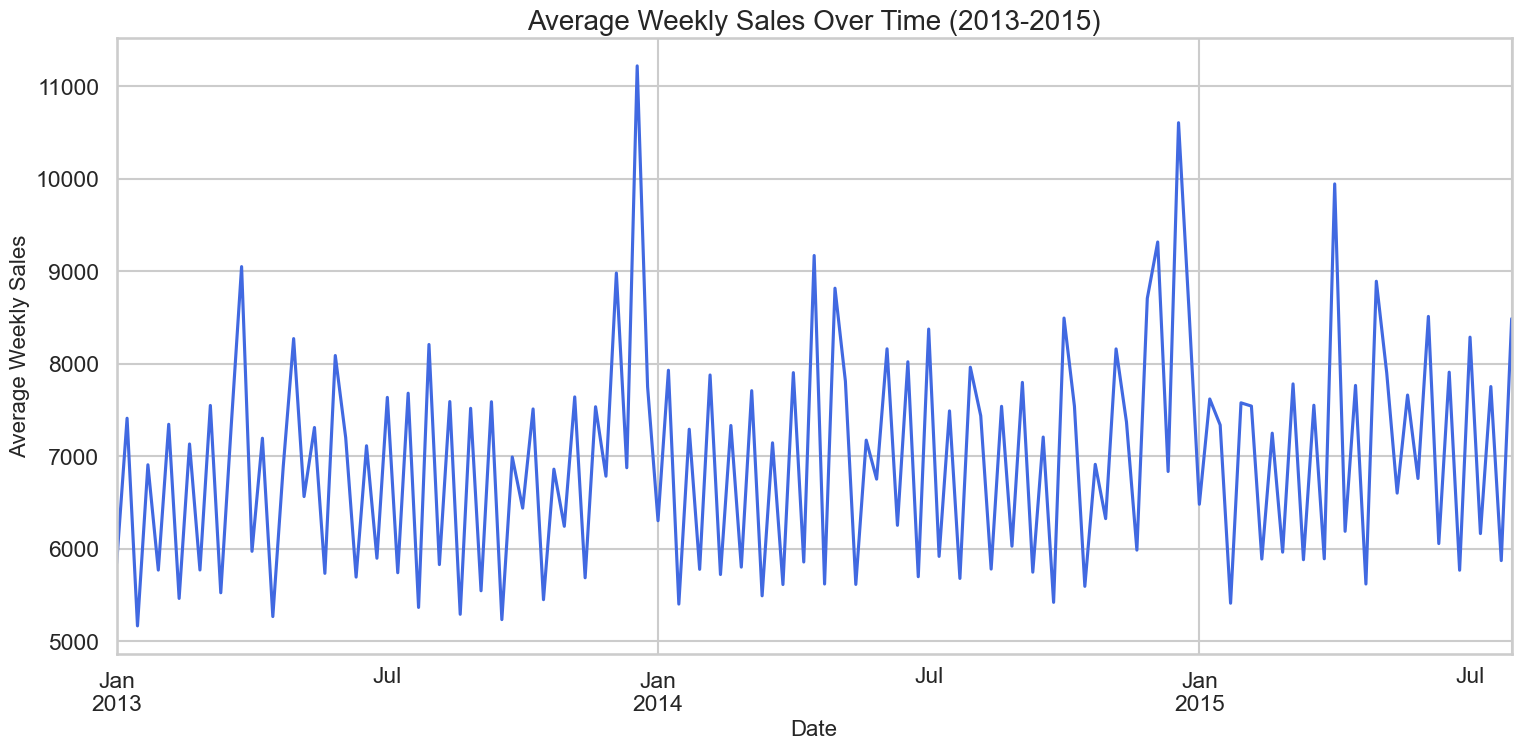

In [9]:
# Set the 'Date' column as the index of our DataFrame, which is best practice for time series data.
df_time = df_open.set_index('Date')

# To make the plot readable, we'll 'resample' the data to a weekly average.
# This smooths out the daily noise and shows the overall trend more clearly.
df_weekly_sales = df_time['Sales'].resample('W').mean()

# Create the line plot
plt.figure(figsize=(18, 8))
df_weekly_sales.plot(color='royalblue')

# Add titles and labels
plt.title('Average Weekly Sales Over Time (2013-2015)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Weekly Sales', fontsize=16)
plt.grid(True)
plt.show()

C:\Users\xlup\AppData\Local\Temp\ipykernel_1412\1885494442.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=df_open, ax=axes[0], palette='viridis')
C:\Users\xlup\AppData\Local\Temp\ipykernel_1412\1885494442.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No Promo (0)', 'Promo (1)'])
C:\Users\xlup\AppData\Local\Temp\ipykernel_1412\1885494442.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Sales', data=df_open, ax=axes[1], palette='plasma')
C:\Users\xlup\AppData\Local\Temp\ipykernel_1412\1885494442.py:24: UserWarning: set_tic

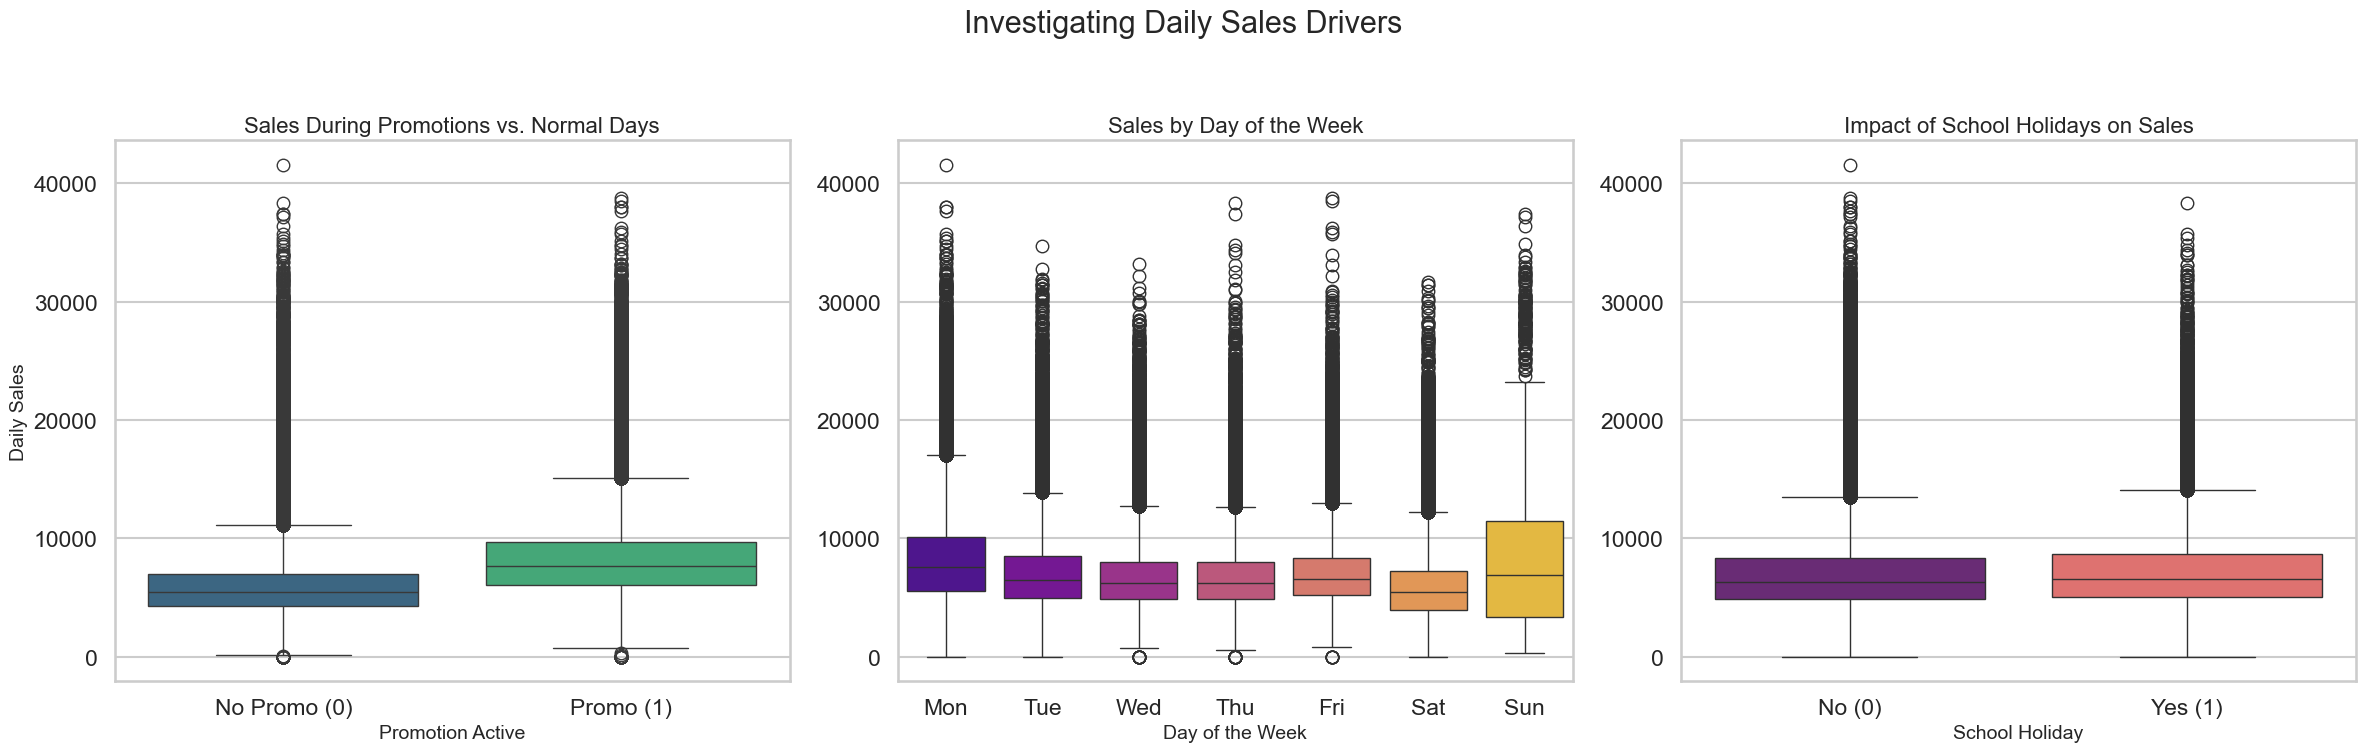

In [10]:
# Set a professional theme for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create a figure with three subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Investigating Daily Sales Drivers', fontsize=22)


# --- Plot 1: Impact of Promotions ---
sns.boxplot(x='Promo', y='Sales', data=df_open, ax=axes[0], palette='viridis')
axes[0].set_title('Sales During Promotions vs. Normal Days', fontsize=16)
axes[0].set_xlabel('Promotion Active', fontsize=14)
axes[0].set_ylabel('Daily Sales', fontsize=14)
axes[0].set_xticklabels(['No Promo (0)', 'Promo (1)'])


# --- Plot 2: Sales by Day of the Week ---
sns.boxplot(x='DayOfWeek', y='Sales', data=df_open, ax=axes[1], palette='plasma')
axes[1].set_title('Sales by Day of the Week', fontsize=16)
axes[1].set_xlabel('Day of the Week', fontsize=14)
axes[1].set_ylabel('') # Remove y-label to avoid repetition
# The dataset labels Monday as 1 and Sunday as 7
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].set_xticklabels(day_labels)


# --- Plot 3: Impact of School Holidays ---
sns.boxplot(x='SchoolHoliday', y='Sales', data=df_open, ax=axes[2], palette='magma')
axes[2].set_title('Impact of School Holidays on Sales', fontsize=16)
axes[2].set_xlabel('School Holiday', fontsize=14)
axes[2].set_ylabel('') # Remove y-label
axes[2].set_xticklabels(['No (0)', 'Yes (1)'])


# Adjust the layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
